<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/Guassian_Process_Interpolation_Understanding_Gentrification_jgkorman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLPP22 // Assignment #4**

assigned : **Apr 4, 2022**

DUE : **Apr 10, 2022 11:59pm**

## Outcomes of gentrification: local changes to median income

<img src="https://cdn.theatlantic.com/assets/media/img/mt/2015/08/20720085886_db5d1f89e8_o/lead_720_405.jpg?mod=1533691764" width=500>

---

In class we discussed the definition of gentrification and the outcomes associated with that process.  Our specific example was the changing demographic makeup of Philadelphia over the period of 2000 to 2016.  In this assignment, we'll be doing an identical comparison, but considering local changes to median income.

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None

---

### **PART 1 - Background**

<b>

  <u>In your own words</u>, provide a brief (~400-500 words) descriptive overview of the effects of gentrification on displacement as well as the use of census data by researchers to quantify these outcomes. Please include *references* within the description via weblinks.

</b>

[Gentrification can be formally defined as a process where there is an influx of middle and upper class people that move into poorer areas and attempt to renovate homes and build businesses which leads to increased property values along with the displacement of residents who once lived in the areas being gentrified.](https://www.merriam-webster.com/dictionary/gentrification). With this definition in place -- one may think that this is possibly a good outcome for a given community, however, it has been shown that gentrifcation often leads to negative outcomes with regards to displacement while fostering [discriminatory practices](https://www.law.georgetown.edu/poverty-journal/blog/examining-the-negative-impacts-of-gentrification/#:~:text=Gentrification%20usually%20leads%20to%20negative,individuals%20and%20people%20of%20color.) and behaviors that often exclude those with low incomes and people of color. 

[The reason that gentrification's impact on displacement is often negative happens for a multitude of reasons.](https://www.law.georgetown.edu/poverty-journal/blog/examining-the-negative-impacts-of-gentrification/#:~:text=Gentrification%20usually%20leads%20to%20negative,individuals%20and%20people%20of%20color.) For one, as areas become renovated and rents/home prices naturally rise, it forces out low income households. Moreover, the process of gentrification also helps investors at the expense of residents as they continue to earn more profits in building new and renovated buildings securing greater investments and returns on their capital -- which further reinforces the powerful position of the investor and owners at the expense of the prior residents living in an area that is becoming gentrified. 

It has been noted as well that gentrification often leads to[ cultural displacement](https://ncrc.org/gentrification/) too. Albeit gentrification raises the value of properties and areas that have long suffered from a lack of investment, the existing residents living in these areas, often hispanic and or black, become displaced which prevents them from obtaining the benefits of economic rejuvenation in the area along with better quality of life and services. Interestingly enough but not surprising, the severe effects of gentrification are often felt most accutely in the nation's [largest cities](https://ncrc.org/gentrification/) while being rare in most other locales of the country. The same report cited above also found that 7 cities accounted for almost half of the gentrification taking place nationally, two of them were Philadelphia and Baltimore, cities that are very close to us here in Newark, DE. To that end, any resident local to Newark, DE that happens to drive through Wilmington, DE, about 20 minutes away, can't help but notice the excessive gentrfication in that city as well. 

Overall, gentrification poses a serious policy problem. By using [census data](https://www.urban.org/sites/default/files/publication/100135/guide_to_measuring_neighborhood_change_to_understand_and_prevent_displacement.pdf), researchers are able to quantify gentrification outcomes helping us to understand the problem gentrification poses and its effects over time. Census data is a great choice to study the impacts of gentrification due to the geographic information the census data carries with it. This geographic information is very robust because they are standard geographies with baseline datasets. The census data also helps researchers to understand the effects of gentrification by enabling researchers to look at changes over time. Overall, census data is a great choice for researchers to use to better understand gentrification and its impact on displacement. 

### **PART 2 - Loading and Working With the Census Data**


<b> Link your google drive and install geopandas. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas
!pip install censusdata

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import plotly.express as px 
import censusdata

<b> Load in the pre-cleaned 2000 median income data from the `data/census/income/` directory <u>as well as</u> the 2000 and 2016 shapefiles (in the `data/census/ctshapes` directory).  Make sure that you call the census tract GeoDataFrames `ct00` and `ct16`.</b>

In [ ]:
fname = "/content/drive/MyDrive/mlpp22/data/census/income/census_income_2000.csv"
income2000 = pd.read_csv(fname)
income2000



,Id2_2000,Median household income in 1999
0,42101000100,48886.0
1,42101000200,8349.0
2,42101000300,40625.0
3,42101000400,27400.0
4,42101000500,9620.0
...,...,...
375,42101036302,47995.0
376,42101036303,53614.0
377,42101036400,51250.0
378,42101036500,50447.0


In [ ]:
fname = "/content/drive/MyDrive/mlpp22/data/census/ctshapes/2000/tr42_d00.shp"
ct00 = gp.read_file(fname)
ct00 


,AREA,PERIMETER,TR42_D00_,TR42_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry
0,0.004057,0.398728,2,1,42,049,011701,0117.01,TR,None,"POLYGON ((-79.76214 42.24141, -79.77252 42.235..."
1,0.017494,0.558170,3,2,42,049,011702,0117.02,TR,None,"POLYGON ((-79.78063 42.23206, -79.77991 42.232..."
2,0.000370,0.090991,4,3,42,049,0116,0116,TR,None,"POLYGON ((-79.82202 42.21576, -79.82202 42.215..."
3,0.002350,0.228274,5,4,42,049,011505,0115.05,TR,None,"POLYGON ((-79.90727 42.20936, -79.90287 42.210..."
4,0.005081,0.348200,6,5,42,049,011507,0115.07,TR,None,"POLYGON ((-79.90047 42.18656, -79.90047 42.185..."
...,...,...,...,...,...,...,...,...,...,...,...
3142,0.000252,0.084906,3144,3143,42,055,0122,0122,TR,None,"POLYGON ((-77.57996 39.75687, -77.58633 39.750..."
3143,0.002813,0.304160,3145,3144,42,029,3068,3068,TR,None,"POLYGON ((-75.86815 39.74030, -75.86528 39.736..."
3144,0.001695,0.242311,3146,3145,42,055,012502,0125.02,TR,None,"POLYGON ((-77.46029 39.74365, -77.46004 39.736..."
3145,0.000383,0.115553,3147,3146,42,055,0124,0124,TR,None,"POLYGON ((-77.57768 39.75554, -77.57199 39.752..."


In [ ]:
# -- construct a "proper" geoid that can be mereged with the ACS data
state = ct00["STATE"]
county = ct00["COUNTY"]
tract = ct00["TRACT"]
tract = tract + "00"
tract = tract.str[:6]

affgeoid = "1400000US" + state + county + tract
ct00["AFFGEOID"] = affgeoid
ct00

,AREA,PERIMETER,TR42_D00_,TR42_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry,AFFGEOID
0,0.004057,0.398728,2,1,42,049,011701,0117.01,TR,None,"POLYGON ((-79.76214 42.24141, -79.77252 42.235...",1400000US42049011701
1,0.017494,0.558170,3,2,42,049,011702,0117.02,TR,None,"POLYGON ((-79.78063 42.23206, -79.77991 42.232...",1400000US42049011702
2,0.000370,0.090991,4,3,42,049,0116,0116,TR,None,"POLYGON ((-79.82202 42.21576, -79.82202 42.215...",1400000US42049011600
3,0.002350,0.228274,5,4,42,049,011505,0115.05,TR,None,"POLYGON ((-79.90727 42.20936, -79.90287 42.210...",1400000US42049011505
4,0.005081,0.348200,6,5,42,049,011507,0115.07,TR,None,"POLYGON ((-79.90047 42.18656, -79.90047 42.185...",1400000US42049011507
...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.000252,0.084906,3144,3143,42,055,0122,0122,TR,None,"POLYGON ((-77.57996 39.75687, -77.58633 39.750...",1400000US42055012200
3143,0.002813,0.304160,3145,3144,42,029,3068,3068,TR,None,"POLYGON ((-75.86815 39.74030, -75.86528 39.736...",1400000US42029306800
3144,0.001695,0.242311,3146,3145,42,055,012502,0125.02,TR,None,"POLYGON ((-77.46029 39.74365, -77.46004 39.736...",1400000US42055012502
3145,0.000383,0.115553,3147,3146,42,055,0124,0124,TR,None,"POLYGON ((-77.57768 39.75554, -77.57199 39.752...",1400000US42055012400


In [ ]:
fname = "/content/drive/MyDrive/mlpp22/data/census/ctshapes/2016/cb_2016_42_tract_500k.shp"
ct16 = gp.read_file(fname)
ct16

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,42,101,010200,1400000US42101010200,42101010200,102,CT,360618,0,"POLYGON ((-75.23536 39.96851, -75.23570 39.970..."
1,42,101,011900,1400000US42101011900,42101011900,119,CT,690903,0,"POLYGON ((-75.23367 39.99188, -75.22566 39.991..."
2,42,101,013900,1400000US42101013900,42101013900,139,CT,562937,0,"POLYGON ((-75.17785 39.97425, -75.17378 39.974..."
3,42,101,015700,1400000US42101015700,42101015700,157,CT,485072,0,"POLYGON ((-75.13877 39.97932, -75.13814 39.982..."
4,42,101,016300,1400000US42101016300,42101016300,163,CT,572226,0,"POLYGON ((-75.13902 39.98876, -75.13835 39.991..."
...,...,...,...,...,...,...,...,...,...,...
3212,42,129,805000,1400000US42129805000,42129805000,8050,CT,40577425,57686,"POLYGON ((-79.75986 40.25241, -79.75621 40.253..."
3213,42,121,201400,1400000US42121201400,42121201400,2014,CT,273393108,2598355,"POLYGON ((-79.99978 41.31372, -79.99978 41.369..."
3214,42,125,743700,1400000US42125743700,42125743700,7437,CT,1064187,0,"POLYGON ((-80.22130 40.25623, -80.22016 40.254..."
3215,42,125,751200,1400000US42125751200,42125751200,7512,CT,13500577,0,"POLYGON ((-80.33256 40.20118, -80.33061 40.199..."


**Install the `censusdata` [package](https://jtleider.github.io/censusdata/) and use it to retrieve the 2016 ACS 5-year estimates for the median income for census tracts in Philadelphia County$^{\dagger}$.**

<small> $^{\dagger}$ Note, the table number is B19013.  See the notebook `mlpp22/week6/03.15.2022/mlpp22_censusdata_example.ipynb` for an example.  If you are unable to complete this task, let me know and I will provide the data to you (for a point penalty).

In [ ]:
# -- print column names in the B19013 table
censusdata.printtable(censusdata.censustable("acs5", 2016, "B19013"))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19013_001E  | MEDIAN HOUSEHOLD INCOME IN THE | !! Estimate Median household income in the past 12 month | int  
-------------------------------------------------------------------------------------------------------------------


In [ ]:
# -- list all state codes
censusdata.geographies(censusdata.censusgeo([("state", "*")]), "acs5", 2016)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

The PA State Code is 42

In [ ]:
censusdata.geographies(censusdata.censusgeo([("state", "42"), ("county", "*")]), "acs5", 2016)

{'Adams County, Pennsylvania': censusgeo((('state', '42'), ('county', '001'))),
 'Allegheny County, Pennsylvania': censusgeo((('state', '42'), ('county', '003'))),
 'Armstrong County, Pennsylvania': censusgeo((('state', '42'), ('county', '005'))),
 'Beaver County, Pennsylvania': censusgeo((('state', '42'), ('county', '007'))),
 'Bedford County, Pennsylvania': censusgeo((('state', '42'), ('county', '009'))),
 'Berks County, Pennsylvania': censusgeo((('state', '42'), ('county', '011'))),
 'Blair County, Pennsylvania': censusgeo((('state', '42'), ('county', '013'))),
 'Bradford County, Pennsylvania': censusgeo((('state', '42'), ('county', '015'))),
 'Bucks County, Pennsylvania': censusgeo((('state', '42'), ('county', '017'))),
 'Butler County, Pennsylvania': censusgeo((('state', '42'), ('county', '019'))),
 'Cambria County, Pennsylvania': censusgeo((('state', '42'), ('county', '021'))),
 'Cameron County, Pennsylvania': censusgeo((('state', '42'), ('county', '023'))),
 'Carbon County, Penn

Philadelphia County Code is 101

In [ ]:
# -- set the column names
cols = ["B19013_001E"]

# -- set the geography and spatial aggregation to tracts (the "*"" means to get "all tracts")
geo = censusdata.censusgeo([("state", "42"), ("county", "101"), ("tract", "*")])

# -- load the data into a DataFrame
data = censusdata.download("acs5", 2016, geo, cols)

In [ ]:
data

,B19013_001E
"Census Tract 83.01, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:008301",29770
"Census Tract 83.02, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:008302",31202
"Census Tract 63, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:006300",25871
"Census Tract 73, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:007300",25369
"Census Tract 79, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:007900",56944
...,...
"Census Tract 236, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:023600",67147
"Census Tract 239, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:023900",20843
"Census Tract 242, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:024200",22500
"Census Tract 245, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:024500",16474


In [ ]:
# -- reset the index
data = data.reset_index()
data

,index,B19013_001E
0,"Census Tract 83.01, Philadelphia County, Penns...",29770
1,"Census Tract 83.02, Philadelphia County, Penns...",31202
2,"Census Tract 63, Philadelphia County, Pennsylv...",25871
3,"Census Tract 73, Philadelphia County, Pennsylv...",25369
4,"Census Tract 79, Philadelphia County, Pennsylv...",56944
...,...,...
379,"Census Tract 236, Philadelphia County, Pennsyl...",67147
380,"Census Tract 239, Philadelphia County, Pennsyl...",20843
381,"Census Tract 242, Philadelphia County, Pennsyl...",22500
382,"Census Tract 245, Philadelphia County, Pennsyl...",16474


In [ ]:
# -- print the attributes of the first geography
fgeo = data["index"].iloc[0]
print(dir(fgeo))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'geo', 'hierarchy', 'name', 'params', 'request', 'sumlevel', 'sumleveldict']


In [ ]:
# -- display the first geography's "geo" attribute
fgeo.geo

(('state', '42'), ('county', '101'), ('tract', '008301'))

Looks like tuples -- we can combine them

In [ ]:
# -- create a GEOID from the first geography's "geo" attribute
geo_tup = fgeo.geo
fgeoid = geo_tup[0][1] + geo_tup[1][1] + geo_tup[2][1]

print(fgeoid)

42101008301


In [ ]:
# -- define a function to create a GEOID from a geography
def make_geoid(geography):
  """ This function extracts the state number, county number, and tract number 
  from a geography's "geo" attribute and combines them into a GEOID. """

  geo_tup = geography.geo
  geoid = geo_tup[0][1] + geo_tup[1][1] + geo_tup[2][1]

  return geoid

In [ ]:
# -- apply that function to every element of the "index" column
geoids = data["index"].apply(make_geoid)

print(geoids)

0      42101008301
1      42101008302
2      42101006300
3      42101007300
4      42101007900
          ...     
379    42101023600
380    42101023900
381    42101024200
382    42101024500
383    42101025400
Name: index, Length: 384, dtype: object


In [ ]:
# -- add those GEOIDs back into the data
data["GEOID"] = geoids

print(data)

                                                 index  B19013_001E  \
0    Census Tract 83.01, Philadelphia County, Penns...        29770   
1    Census Tract 83.02, Philadelphia County, Penns...        31202   
2    Census Tract 63, Philadelphia County, Pennsylv...        25871   
3    Census Tract 73, Philadelphia County, Pennsylv...        25369   
4    Census Tract 79, Philadelphia County, Pennsylv...        56944   
..                                                 ...          ...   
379  Census Tract 236, Philadelphia County, Pennsyl...        67147   
380  Census Tract 239, Philadelphia County, Pennsyl...        20843   
381  Census Tract 242, Philadelphia County, Pennsyl...        22500   
382  Census Tract 245, Philadelphia County, Pennsyl...        16474   
383  Census Tract 254, Philadelphia County, Pennsyl...        51806   

           GEOID  
0    42101008301  
1    42101008302  
2    42101006300  
3    42101007300  
4    42101007900  
..           ...  
379  421010236

Drop the original geographies 

In [ ]:
# -- drop the original geographies
data = data.drop(columns=["index"])
income2016 = data
income2016

,B19013_001E,GEOID
0,29770,42101008301
1,31202,42101008302
2,25871,42101006300
3,25369,42101007300
4,56944,42101007900
...,...,...
379,67147,42101023600
380,20843,42101023900
381,22500,42101024200
382,16474,42101024500


<b> In the income DataFrames, rename the column `"Median household income in 1999"` to `"income_2000"` and the column `"B19013_001E"` to `"income_2016"` (print the heads of the DataFrames to see if it worked).</b>

In [ ]:
income2000.columns = ['GEOID', 'income_2000']
print(income2000.head(1))

income2016.columns = ['income_2016', 'GEOID']
print(income2016.head(1))

         GEOID  income_2000
0  42101000100      48886.0
   income_2016        GEOID
0        29770  42101008301


In [ ]:
income2000 = income2000.astype(int)
income2000.dtypes

GEOID          int64
income_2000    int64
dtype: object

In [ ]:
income2016 = income2016.astype(int)
income2016.dtypes

income_2016    int64
GEOID          int64
dtype: object

In [ ]:
# -- drop census tracts with no people
income2000 = income2000[income2000['income_2000'] > 0]
income2016 = income2016[income2016['income_2016'] > 0]

In [ ]:
income2016

,income_2016,GEOID
0,29770,42101008301
1,31202,42101008302
2,25871,42101006300
3,25369,42101007300
4,56944,42101007900
...,...,...
379,67147,42101023600
380,20843,42101023900
381,22500,42101024200
382,16474,42101024500


In order to compare 2000 dollars to 2016 dollars we need to adjust for inflation.  We could assume a model for inflation, but instead, let's just adjust the 2000 data so that it has the same mean as the 2016 data.

<b> First, plot a histogram of the 2000 incomes and a histogram of the 2016 incomes, each with 50 bins and range 0 to 140000 and `alpha=0.5`. </b>

Text(0.5, 1.0, '')

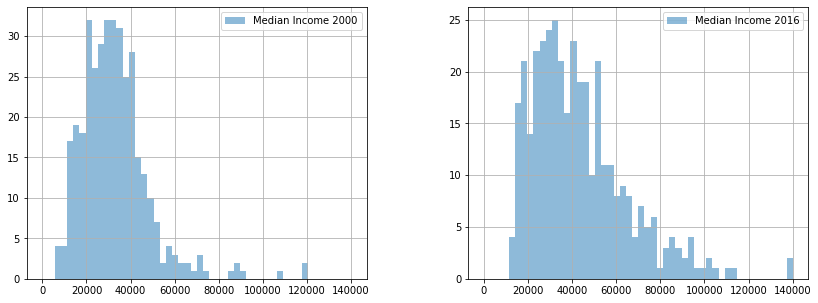

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
income2000.hist('income_2000', ax=ax[0], bins=50, alpha = 0.5, range=[0, 140000], label= "Median Income 2000")
income2016.hist('income_2016', ax=ax[1], bins=50, alpha = 0.5, range=[0, 140000], label= "Median Income 2016")
ax[0].legend()
ax[1].legend()
ax[0].set_title("")
ax[1].set_title("")


**Figure 1** above plots hisograms of the median incomes for zipcodes in Philadelphia area for the year 2000 and 2016 on the left and right panels respectively. Overall, without adjusting for inflation, the distributions of incomes for 2016 on the right hand panel are more massed overall towards the upper bound suggesting to us incomes have risen since 2000.

You can see that the 2016 incomes are a bit higher on average.

<b> Now calculate the ratio between the mean 2016 income and mean 2000 income.  Create a column in the 2000 income DataFrame called `"income_2000_adj"` that is `"income_2000"` times that ratio.  Print the mean of `"income_2016"` and `"income_2000_adj"` to make sure that they are now the same and replot the histograms above with the 2016 and 2000 adjusted incomes. </b>

In [ ]:
print(income2000['income_2000'].mean())
print(income2016['income_2016'].mean())

ratio2000 = income2016['income_2016'].mean() / income2000['income_2000'].mean()
ratio2000

32677.76566757493
43380.21333333333


1.3275146708202907

In [ ]:
income2000['income_2000_adj'] = income2000['income_2000'] * ratio2000
print("the adjusted mean income for 2000 is {0:2f}".format(income2000['income_2000_adj'].mean()))
print('The mean for 2016 income is {0:2f}'.format(income2016['income_2016'].mean()))
print("THEY ARE THE SAME!")


the adjusted mean income for 2000 is 43380.213333
The mean for 2016 income is 43380.213333
THEY ARE THE SAME!


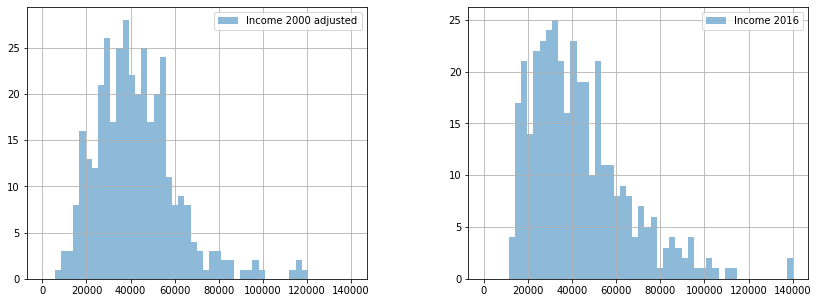

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
income2000.hist('income_2000_adj', ax=ax[0], bins=50, alpha = 0.5, range=[0, 140000], label = "Income 2000 adjusted")
income2016.hist('income_2016', ax=ax[1], bins=50, alpha = 0.5, range=[0, 140000], label= "Income 2016")
ax[0].set_title("")
ax[1].set_title("")
ax[0].legend()
ax[1].legend()

**Figure 2** above plots the adjusted levels per inflation of income per our Philadelphia zipcodes for the year 2000 on the left panel and median income for 2016 on the right panel. Once adjusted for inflation, it does still appear that incomes in 2016 on general have risen since the year 2000, but the difference is much less noticeable as compared to figure 1. 

The 2000 incomes have now been adjusted to 2016 levels$^{\dagger}$ so that we can now take meaningful differences.

<small>$^{\dagger}$ under several assumptions! </small>

### **PART 3 - Merging and Visualizing the Data**

Now we'd like to make some maps of the income data.  Before we do that, we need to clean up the census tract GeoDataFrames a bit.

<b>As we did in class, create a proper `"GEOID"` for year 2000 and coerce both year 2000 and year 2016 `"GEOID"`s into integers.</b>





$\color{red}{\text{******They were coerced above in the previous section both as integers****}}$

<b> Now, merge the 2000 income data into the 2000 census tract GeoDataFrame, creating a new GeoDataFrame called `inc00sh`, and merge the 2016 income data into the 2016 census tract GeoDataFrame creating a new GeoDataFrame called `inc16sh`.</b>

**MERGING THE 2000 INCOME DATA AND GEODATAFRAME**

In [ ]:
ct00['AFFGEOID_short'] = ct00['AFFGEOID'].str[9:].astype(int)
ct00.head(1)

,AREA,PERIMETER,TR42_D00_,TR42_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry,AFFGEOID,AFFGEOID_short
0,0.004057,0.398728,2,1,42,049,011701,0117.01,TR,None,"POLYGON ((-79.76214 42.24141, -79.77252 42.235...",1400000US42049011701,42049011701


In [ ]:
income2000.head(1)

,GEOID,income_2000,income_2000_adj
0,42101000100,48886,64896.882198


In [ ]:
inc00sh = ct00.merge(income2000, left_on='AFFGEOID_short', right_on='GEOID')
inc00sh

,AREA,PERIMETER,TR42_D00_,TR42_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry,AFFGEOID,AFFGEOID_short,GEOID,income_2000,income_2000_adj
0,0.000382,0.101891,2168,2167,42,101,0365,0365,TR,None,"POLYGON ((-74.99801 40.12761, -74.99341 40.132...",1400000US42101036500,42101036500,42101036500,50447,66969.132599
1,0.000186,0.056434,2186,2185,42,101,0358,0358,TR,None,"POLYGON ((-75.02491 40.12891, -75.02011 40.126...",1400000US42101035800,42101035800,42101035800,54449,72281.846311
2,0.000489,0.108181,2200,2199,42,101,0364,0364,TR,None,"POLYGON ((-74.97981 40.11971, -74.97541 40.120...",1400000US42101036400,42101036400,42101036400,51250,68035.126880
3,0.000237,0.067885,2201,2200,42,101,0359,0359,TR,None,"POLYGON ((-75.01531 40.12361, -75.01172 40.121...",1400000US42101035900,42101035900,42101035900,43582,57855.744384
4,0.000218,0.062643,2212,2211,42,101,0357,0357,TR,None,"POLYGON ((-75.03762 40.12001, -75.03672 40.120...",1400000US42101035700,42101035700,42101035700,34047,45197.891997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.000088,0.043848,2995,2994,42,101,0047,0047,TR,None,"POLYGON ((-75.17772 39.91261, -75.17702 39.912...",1400000US42101004700,42101004700,42101004700,44080,58516.846690
363,0.000048,0.027687,3000,2999,42,101,0048,0048,TR,None,"POLYGON ((-75.16532 39.91121, -75.16682 39.904...",1400000US42101004800,42101004800,42101004800,30455,40429.459300
364,0.000286,0.098508,3009,3008,42,101,0051,0051,TR,None,"POLYGON ((-75.17362 39.90521, -75.17477 39.898...",1400000US42101005100,42101005100,42101005100,28417,37723.984401
365,0.000087,0.036964,3023,3022,42,101,0056,0056,TR,None,"POLYGON ((-75.24053 39.90361, -75.23893 39.898...",1400000US42101005600,42101005600,42101005600,21801,28941.147339


**MERGING THE 2016 INCOME DATA AND GEODATAFRAME**

In [ ]:
income2016.head(1)

,income_2016,GEOID
0,29770,42101008301


In [ ]:
ct16['GEOID'] = ct16['GEOID'].astype(int)
ct16.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
AFFGEOID      object
GEOID          int64
NAME          object
LSAD          object
ALAND          int64
AWATER         int64
geometry    geometry
dtype: object

In [ ]:
ct16.head(1)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,42,101,010200,1400000US42101010200,42101010200,102,CT,360618,0,"POLYGON ((-75.23536 39.96851, -75.23570 39.970..."


In [ ]:
inc16sh = ct16.merge(income2016, left_on = 'GEOID', right_on = 'GEOID')
inc16sh

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,income_2016
0,42,101,010200,1400000US42101010200,42101010200,102,CT,360618,0,"POLYGON ((-75.23536 39.96851, -75.23570 39.970...",16071
1,42,101,011900,1400000US42101011900,42101011900,119,CT,690903,0,"POLYGON ((-75.23367 39.99188, -75.22566 39.991...",30854
2,42,101,013900,1400000US42101013900,42101013900,139,CT,562937,0,"POLYGON ((-75.17785 39.97425, -75.17378 39.974...",14314
3,42,101,015700,1400000US42101015700,42101015700,157,CT,485072,0,"POLYGON ((-75.13877 39.97932, -75.13814 39.982...",38991
4,42,101,016300,1400000US42101016300,42101016300,163,CT,572226,0,"POLYGON ((-75.13902 39.98876, -75.13835 39.991...",14017
...,...,...,...,...,...,...,...,...,...,...,...
370,42,101,033000,1400000US42101033000,42101033000,330,CT,732828,0,"POLYGON ((-75.04059 40.03686, -75.03929 40.037...",38070
371,42,101,034400,1400000US42101034400,42101034400,344,CT,3399171,13905,"POLYGON ((-75.06946 40.09441, -75.05834 40.105...",85058
372,42,101,036000,1400000US42101036000,42101036000,360,CT,2043083,638,"POLYGON ((-75.02393 40.10070, -75.00539 40.114...",53708
373,42,101,036900,1400000US42101036900,42101036900,369,CT,1855494,193283,"POLYGON ((-75.20784 39.94129, -75.20506 39.943...",44464


<b> Plot the adjusted 2000 incomes on a map with `vmin = 20000` and `vmax = 120000`.  Do the same for the 2016 incomes.  Make sure to include the legend (colorbar) and add text to indicate what those color values represent.</b>

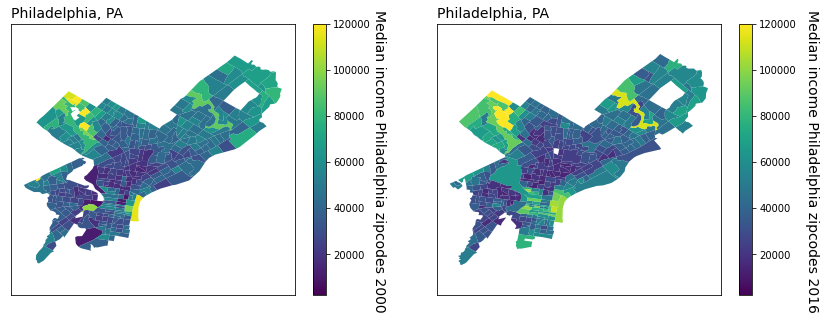

In [ ]:
# -- make a new 2000 choropleth (and plot with 2016)
fig, ax = plt.subplots(1, 2, figsize=[14, 5])
inc00sh.plot("income_2000_adj", legend=True, vmin=2000, vmax=120000, ax=ax[0])
ax[0].axis("equal")
ax[0].set_title("Philadelphia, PA", loc="left", fontsize=14)
fig.text(0.49, 0.5, "Median income Philadelphia zipcodes 2000", ha="center", 
         va="center", rotation=-90, fontsize=14)
ax[0].set_xticks([])
ax[0].set_yticks([])
fig.show()

inc16sh.plot("income_2016", legend=True, vmin=2000, vmax=120000, ax=ax[1])
ax[1].axis("equal")
ax[1].set_title("Philadelphia, PA", loc="left", fontsize=14)
fig.text(0.92, 0.5, "Median income Philadelphia zipcodes 2016", ha="center", 
         va="center", rotation=-90, fontsize=14)
ax[1].set_xticks([])
ax[1].set_yticks([])
fig.show()

**Figure 3** plots the adjusted income per inflation for the year 2000 for Philadelphia zipcodes on the left panel and it plots the income for year 2016 for Philadelphia zipcodes on the right-side panel. Overall, we see that incomes in general have increased across zipcodes in Philadelphia between 2000 and 2016 as is evident by the lightening of the chorpleth map on the right side panel. However, increased gentrifcation appears to be occuring without a doubt in 2016 relative to 2000 as is evidenced by the high income zipcodes shown in yellow and the surrounding zipcodes shown in darkshades of blue and or green. I am not an expert on Philadelphia geography however, thus, I leave it to the reader to interpret the various areas and their changes at a more granular level. 

We can already see some differences popping out, especially with respect to Center City (and Fishtown) and North Philadelphia.  To properly visulize those, we'd like to take the difference of these two maps.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


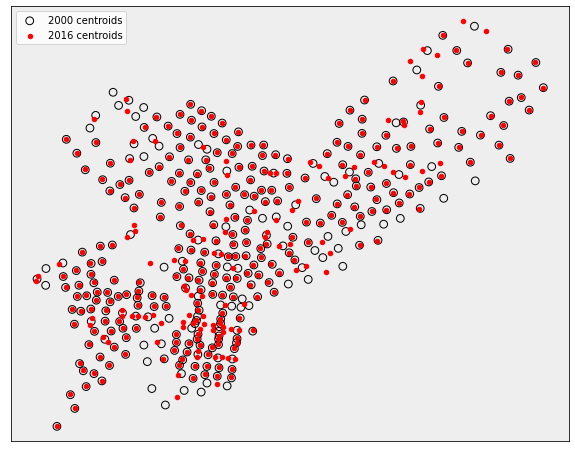

In [ ]:
# -- let's look at just how far off the centroids of the zips actually are
lon00 = inc00sh.centroid.x
lat00 = inc00sh.centroid.y

lon16 = inc16sh.centroid.x
lat16 = inc16sh.centroid.y

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(lon00, lat00, facecolor="none", color="k", s=60, label="2000 centroids")
ax.scatter(lon16, lat16, c="r", s=20, label="2016 centroids")
ax.set_facecolor("#EEEEEE")
ax.legend()
ax.axis("equal")
ax.set_xticks([])
ax.set_yticks([])
fig.show()

**Figure 4** adds nothing new to the analysis (just extra) showing how the centroids for our zipcodes in Philadelphia have changed over time. 

### **PART 4 - Interpolating to 2000 data on 2016 Locations**

In class, merging the 2000 data into the 2016 GeoDataFrame resulted in a lot of dropped census tracts b/c the definition of the census tracts changed over time.  To recover those, we need an estimate of the adjusted 2000 income value at each 2016 census tract.  We can do this by interpolating (using Gaussian Process Regression [aka Kriging]) the adjusted 2000 values onto the 2016 locations.

<b> Import the GaussianProcessRegressor model as well as the ConstantKernel and RBF kernels. </b>

In [ ]:
# -- let's use Gaussian Process Regression to interpolate the 2000 data to the 
#    2016 locations.

# -- first some imports
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

<b> As we did in class, create the features array (lat/lon) and labeled data (2000 adjusted median incomes) for the model from the `inc00sh` GeoDataFrame.  Make sure to use `.values.copy()` for these so that these are numpy arrays and not pandas Series objects. </b>

In [ ]:
# -- we need the usual 2D array of Nobj x Nfeat
pos00 = np.vstack([lon00, lat00]).T

# -- and an Nobj "target"
income00  = inc00sh['income_2000_adj'].values.copy()

As always, the features need to be standardized.

<b> Standardize the features array across objects and standardize the object labels. </b>

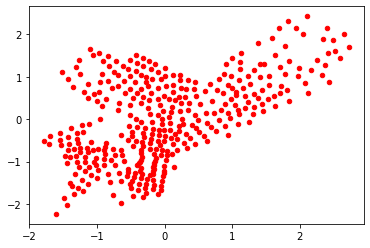

In [ ]:
# -- now we need to standardize before fitting
pos00m = pos00.mean(0)
pos00s = pos00.std(0)
income00m = income00.mean()
income00s = income00.std()

pos00 -= pos00m
pos00 /= pos00s
income00 -= income00m
income00 /= income00s

# -- check the values
plt.scatter(pos00[:, 0], pos00[:, 1], c="r", s=20)

**Figure 5** Just checking values here -- adding nothing new to the analysis. 

<b> Fit a GPR model to the standardized 2000 data (remember to intialize the kernel).</b>

In [ ]:
# -- now we initialize the kernel and fit to the data
kernel = C(1.0, (1e-3, 1e3)) * RBF(10., (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gpr.fit(pos00, income00)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10)

The model has now been fit to the 2000 adjusted median income data at the 2000 census tract locations.  Now we want to interpolate onto the 2016 positions.

<b> Create a features array for the 2016 census tract positions making sure to standardize. </b>

In [ ]:
# -- now we can use this fit model to predict the 2000 census data at the 2016 
#    census tract centroids

# -- create the features array
pos16 = np.vstack([lon16, lat16]).T


# -- standardize
pos16 -= pos00m
pos16 /= pos00s




<b> Interpolate the trained model onto these positions using the `.predict()` method. </b>

In [ ]:
# -- predict
income16pred = gpr.predict(pos16)

<b> Unstandardize these values so that they are real dollars and put those into a column in `inc16sh` called `"income_2000_interp"`. </b>

In [ ]:
# -- now un-standardize and reattatch to the GeoDF
inc16sh["income_2000_interp"] = income16pred * income00s + income00m
inc16sh["income_diff_pred"] = inc16sh['income_2016'] - inc16sh['income_2000_interp']

So now we have a column of interpolated values of the 2000 adjusted incomes at the locations of the 2016 census tracts.

<b> Make a map of the difference between the 2016 median income and the adjusted 2000 median income using the `coolwarm` color map, `vmin = -20000` and `vmax = 20000`. </b>

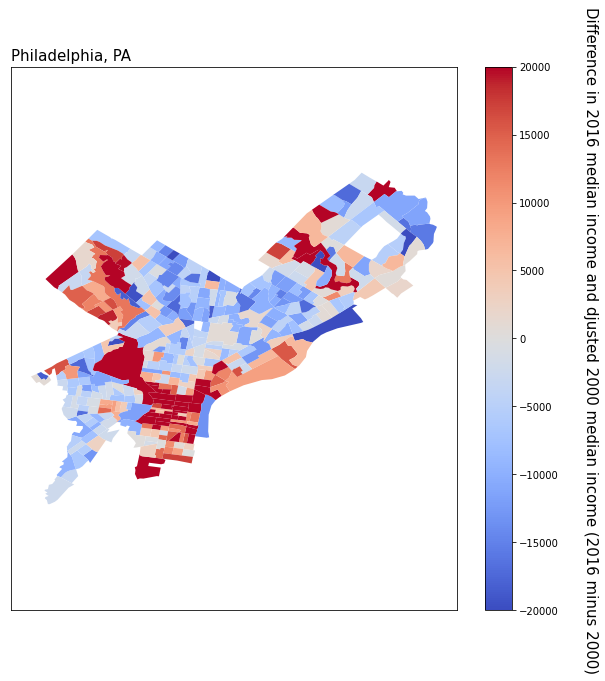

In [ ]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
inc16sh.plot("income_diff_pred", cmap="coolwarm", vmin=-20000, vmax=20000, legend=True, ax=ax)
ax.axis("equal")
ax.set_title("Philadelphia, PA", loc="left", fontsize=15)
fig.text(0.93, 0.5, "Difference in 2016 median income and djusted 2000 median income (2016 minus 2000)", ha="center", 
         va="center", rotation=-90, fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
fig.show()

**Figure 6** plots a choropleth map for our Philadelphia zip codes showing the difference between the 2016 median income and the 2000 adjusted median income. It is clear that incomes have risen sharply in some areas relative to others and it is also clear that incomes have dropped sharply in some areas relative to others in the Phildaelphia region. 

**Describe the spatial similarity between this map and the map of 2000/2016 demographic differences we derived in class**

Overall, this map above in figure 6 in comparison to the map of 2000/2016 demographic differences that we had derived in class presents starking similarities. In areas of Philadelphia in the map as derived from class that showed an increase in the fraction of white residents from the year 2000 to 2016 data, we also correspondingly see an increase in incomes in the map as derived here in figure 6 in those same areas for the most part as shown by the red shadeded colors. The story is the same for those areas where the fraction of residents is white had decreased in the map derived from class, we correspondingly see in this map in figure 6 what appears to be a decrease in median incomes. Overall, Philadelphia appears to be gentrified heavily between North and South in both maps (the one derived in class and figure 6 derived here in this notebook). These findings are extremely problematic for the city and its residents. City commissioners in Philadelphia should take notice and implement economic measures to revitalize areas of zipcodes that have poorer median incomes but also implement policies to ensure that the revitalization doesn't kick residents out of these newly revitazlized areas. 

---

### **PART 4 - EXTRA CREDIT: Model accuracy**

<b> Check the accuracy of the Gaussian Process Regression by training on only half of the 2000 data, interpolating onto the locations of the other half of the 2000 data, and plotting the difference between the true values and the interpolated values. </b>